<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/18%20-%20Pandas%20et%20S%C3%A9ries%20Temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Manipulation de Séries Temporelles avec Pandas

## 1. Travailler avec des séries Temporelles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
bitcoin = pd.read_csv('C:/Users/feano/Downloads/BTC-EUR.csv')
#bitcoin = pd.read_csv('C:/Users/feano/Downloads/BTC-EUR.csv', index_col='Date')
#bitcoin = pd.read_csv('C:/Users/feano/Downloads/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


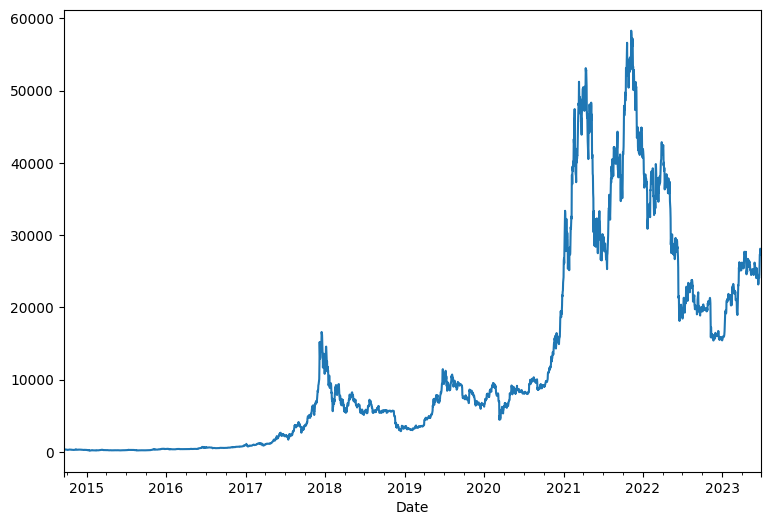

In [9]:
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [10]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
               '2023-06-27', '2023-06-28'],
              dtype='datetime64[ns]', name='Date', length=3207, freq=None)

<Axes: xlabel='Date'>

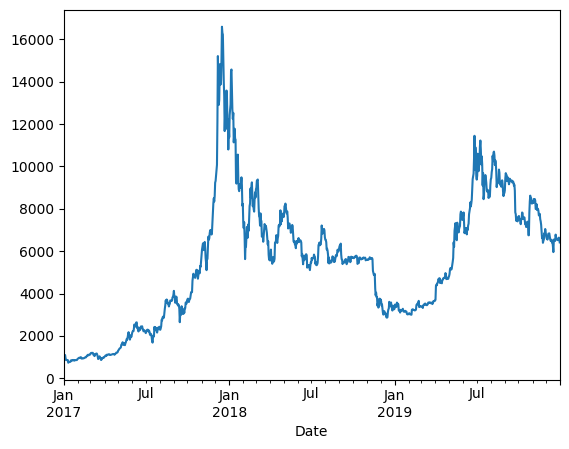

In [11]:
bitcoin.loc['2017':'2019','Close'].plot()

## 2. Resampling des données

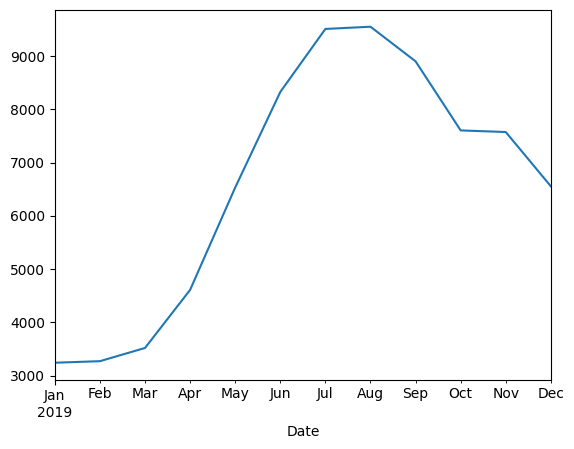

In [15]:
## Resampling par mois
bitcoin.loc['2019', 'Close'].resample('M').mean().plot()
plt.show()

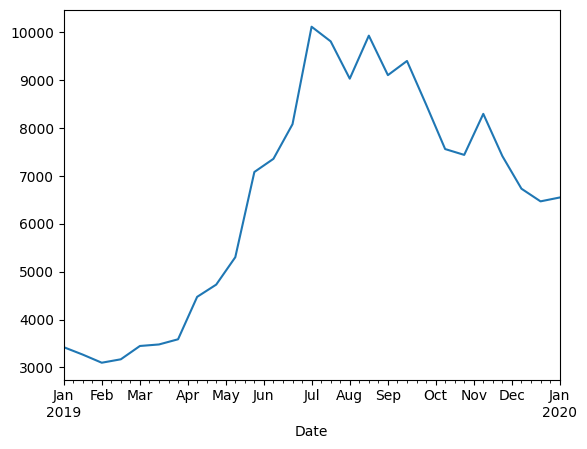

In [13]:
## Resampling avec la moyenne par 2 semaines
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

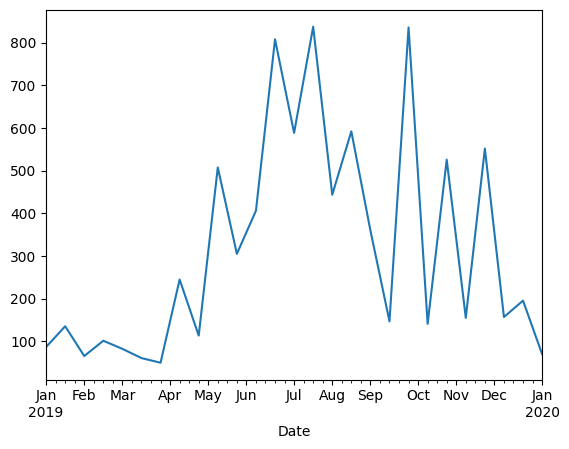

In [16]:
## Resampling avec l'écart type par 2 semaines
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

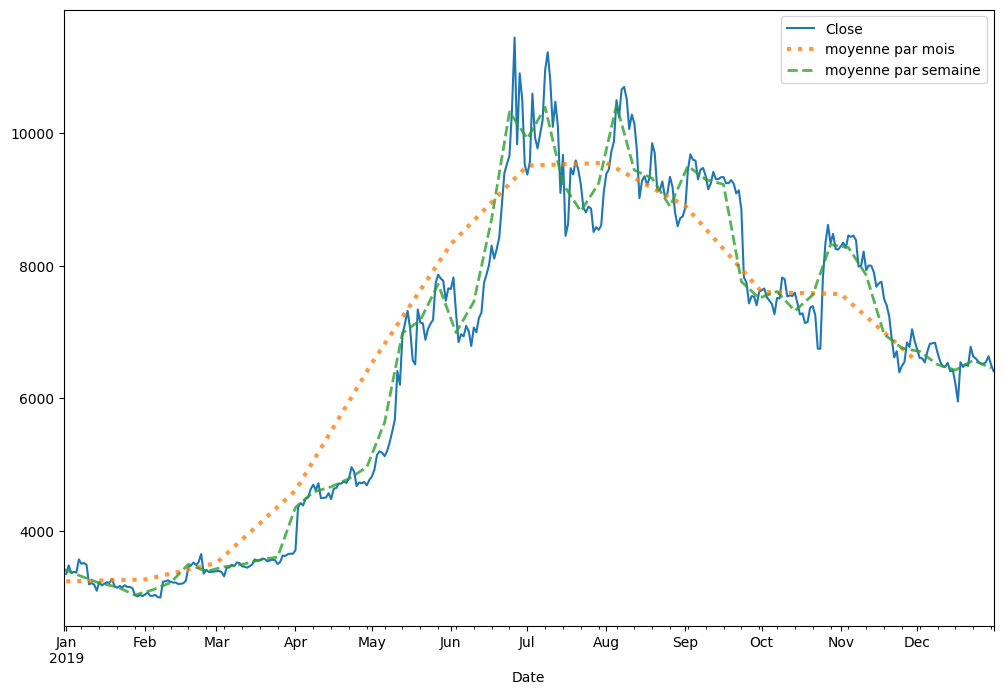

In [19]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
#bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
#bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

## 3. Aggréger les traitements

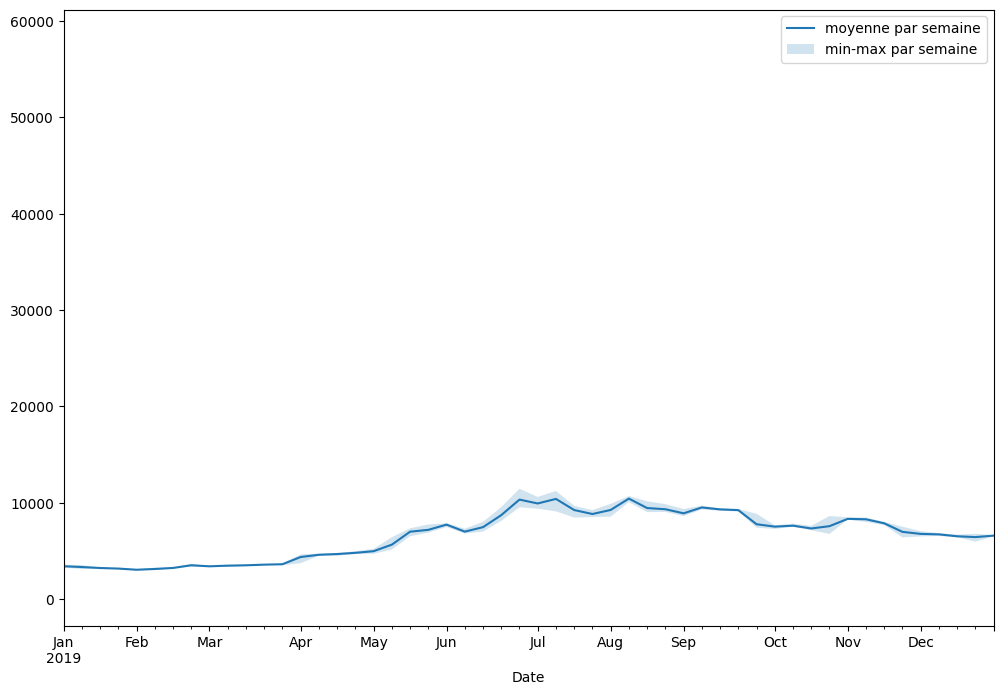

In [22]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<Axes: xlabel='Date'>

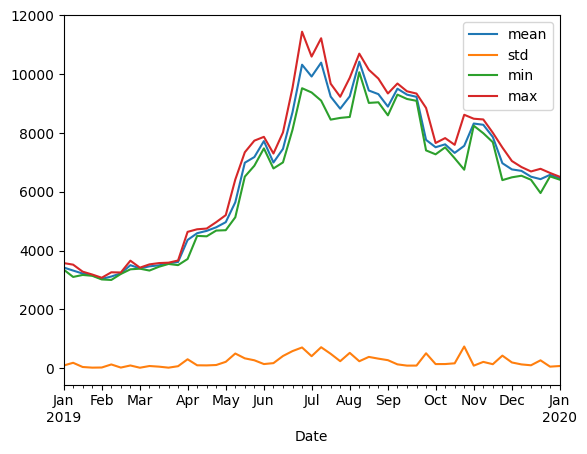

In [23]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## 4. Moyenne glissante et Moyenne glissante exponentielle


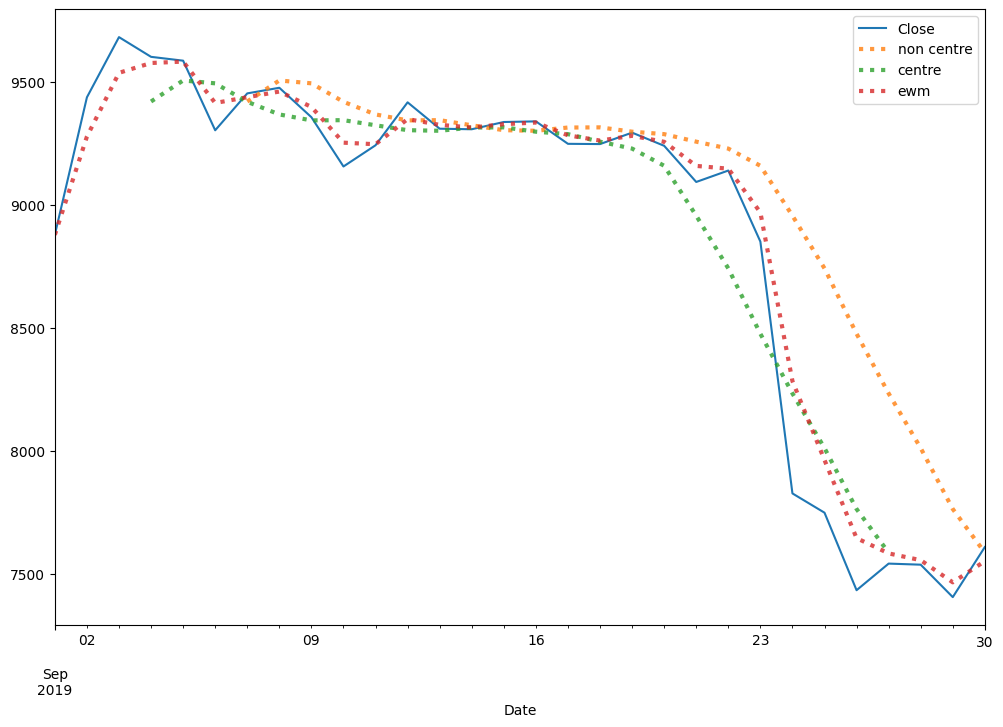

In [27]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
#bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
#bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
#bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

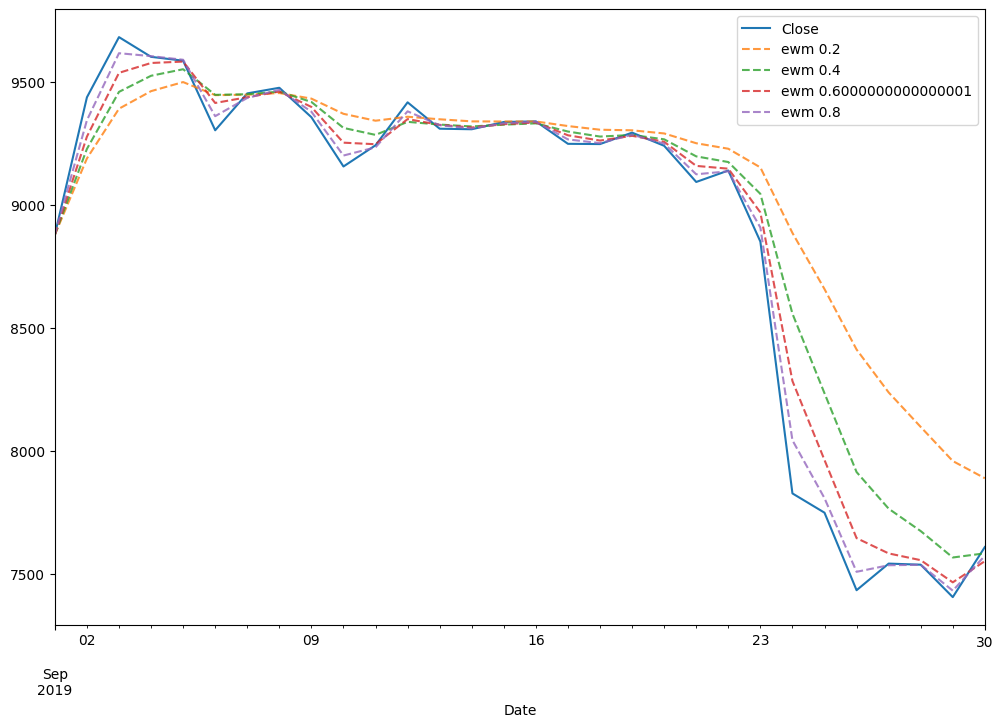

In [28]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

## 5. Comparaison de 2 série temporelles

In [29]:
ethereum = pd.read_csv('C:/Users/feano/Downloads/ETH-EUR.csv', index_col='Date', parse_dates=True)

In [48]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))
btc_eth.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


In [46]:
btc_eth[['Close_btc','Close_eth']]['2019-09'].plot(subplots=True, figsize=(12, 8))

KeyError: '2019-09'